<center>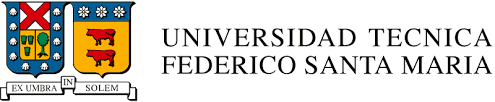</center>



<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 INTRODUCCIÓN AL APRENDIZAJE AUTOMÁTICO - 2023-1 </h1>

<H3 align='center'> Tarea 2  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones en pandas y numpy, imputación de datos y preprocesamientos
* Feature Engineering
* Regresión
* Clasificación
* Árboles y Bosques de Regresión
* Máquinas de ensamblado
* Redes Neuronales


**Formalidades**  
* Equipos de trabajo de 3 personas (*Los estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos), se penalizará fuertemente ausencia de comentarios, explicaciones de gráficos, _etc_. Las preguntas que deben responder se encuentran especificadas explícitamente con letras, ejemplo a) b) c), por lo tanto cualquier pregunta que se encuentre incompleta será penalizada con descuento del puntaje. Recuerde que los códigos presentes en este documento son solo una guía de referencia, por lo tanto no necesariamente funcionan, usted debe mostrar todos sus conocimientos aprendidos a lo largo de la carrera para que su código funcione como se espera. Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_, al correo electrónico de los ayudantes (<sebastian.sanchezl@sansano.usm.cl>), en copia al profesor (<cvalle@inf.utfsm.cl>). Especificar el siguiente asunto: [INF-398-2023-1 Tarea 2]. Invitar como colaborador a los usuarios de github "ssanchezl" para poder acceder al repositorio en caso de ser privado.

* Fecha de presentaciones 30 de Junio, en horario de clases.
* Fecha de entrega: 01 de Julio. Hora límite de entrega: 12:00 p.m. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail igualmente.  

<hr style="height:2px;border:none"/>

Importe las librerías necesarias para cargar explorar el conjunto de datos.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, mean_absolute_error, mutual_info_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeRegressor

# 1. Predicción de la calidad de vinos

Los árboles de regresión, también conocidos como árboles de decisión para regresión, son un tipo de algoritmo de aprendizaje supervisado que se utiliza para predecir valores numéricos. Son una potente herramienta para tareas de regresión y ofrecen varias ventajas y consideraciones.

<center><img src=https://cdn.shopify.com/s/files/1/1277/3667/files/an-essential-guide-1_480x480.png?v=1674719515></center>


Los conjuntos de datos provienen del UCI Machine Learning Repository. Estos conjuntos de datos están relacionados con las variantes tintas y blancas del vino portugués "Vinho Verde".

Estos dos conjuntos de datos contienen varias propiedades químicas de distintos vinos, como la acidez, el pH, el contenido de alcohol, etc. La variable objetivo es la calidad del vino la cual se puntúa del 0 al 10. Puede considerarse una tarea de clasificación o regresión en la que las clases están ordenadas y no balanceadas. Para esta pregunta nos centraremos en la tarea de regresión.

Variables de entrada (basadas en pruebas físico-químicas):
* fixed acidity
* volatile acidity
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* density
* pH
* sulphates
* alcohol
* tipo

Variable objetivo (basadas en datos sensoriales):
* quality



Para obtener más información sobre este conjunto de datos, revise el siguiente link: https://www.kaggle.com/datasets/rajyellow46/wine-quality.

## 1.1 Manipulación y exploración del conjunto de datos

Lo primero es obtener los datos, para esto se pueden descargar los archivos directamente de la página de Kaggle a través del link de la descripción de arriba.

Aplique lo aprendido en la tarea 1 y obtenga los datos de la forma que le sea más conveniente siempre y cuando estos sean los del link de la descripción.

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sanchezl","key":"287e76beaae09a9f4fc2eec6e96cbf21"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d rajyellow46/wine-quality

In [ ]:
!unzip /content/wine-quality.zip

Archive:  /content/wine-quality.zip
  inflating: winequalityN.csv        


In [189]:
df = pd.read_csv('winequalityN.csv')

### 1.1.1 Exploración del conjunto de datos

Explore el conjunto de datos y responda brevemente las siguientes preguntas:

> a) ¿Cuáles variables poseen valores numéricos y cuáles poseen valores categóricos?

La única variable con valores categóricos es "type" que indica el tipo de vino, es decir, si es blanco o rojo. El resto corresponde a valores numéricos

> b) ¿Existen datos faltantes, si es así en qué atributos faltan datos y cuantos faltan?

Existen datos faltantes en las siguientes categorías
- Fixed acidity: con 10 NaN values
- Volatile acidity: con 8 NaN values
- Citric acid: con 3 NaN values
- Residual sugar: con 2 Nan values
- Chlorides: con 2 Nan values
- Ph: con 9 Nan values
- Sulphates: con 4 Nan Values

> c) ¿Qué técnicas conoce para rellenar los datos faltantes de los atributos del dataset? (si no conoce ninguna investigue al menos 2)

- Imputación por media: Reemplazar los valores faltantes por la media de los valores existentes de ese atributo
- Imputación por mediana: Reemplazar los valores faltantes por la mediana de los valores existentes de ese atributo
- Imputación por moda: Reemplazar los valores faltantes por la moda de los valores existentes de ese atributo
- Imputación mediante modelos predictivos: Utilizar modelos de aprendizaje automático, como regresión o clasificación, para predecir los valores faltantes en función de otros atributos




In [190]:
def datainfo(data):
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100 
    return temp_ps

datainfo(df)

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
type,object,6497,2,0,0.000000
fixed acidity,float64,6487,106,10,0.153917
volatile acidity,float64,6489,187,8,0.123134
citric acid,float64,6494,89,3,0.046175
residual sugar,float64,6495,316,2,0.030783
chlorides,float64,6495,214,2,0.030783
free sulfur dioxide,float64,6497,135,0,0.000000
total sulfur dioxide,float64,6497,276,0,0.000000
density,float64,6497,998,0,0.000000
pH,float64,6488,108,9,0.138525


### 1.1.2 Exploración de Features

En problemas de regresión, el desbalance de la variable objetivo se refiere a una distribución desigual de los valores de la variable objetivo en el conjunto de datos. Esto significa que hay una presencia significativa de valores en una clase o rango de valores en comparación con otras clases o rangos de valores. Considerando lo anterior responda las siguientes preguntas:

> a) Grafique histogramas y box plots de cada variable y comente acerca de la distribución de las características y de la variable objetivo

En las variables fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide y sulphates, se observa que hay una concentracion en pocos valores, es decir, que las clases no estan balanceadas, si se observan los diagramas de cajas, se puede ver la existencia de muchos valores fuera del estadistico.

Por otro lado el total sulfur dioxide, pH, alcohol y density son los que se muestran mas balanceados que los mencionados anteriormente, a pesar de que hay valores con mayor representacion que otros, en los diagramas de cajas se puede observar la existencia de pocos valores fuera de lo esperado y pueden ser considerados como atipicos.

> b) ¿Considera que están *balanceados* los valores de la variable objetivo?

No, se ve que hay mucha representacion de vinos de calidad media (los de valoriacion 5,6,7 representan casi el 90% de datos) y pocos de baja y alta calidad

> c) ¿Cómo afecta el desbalance en problemas de regresión en términos de la predicción y de la evaluación de un modelo?

Afecta las capacidades de generalizacion del modelo, ya que, va a ser mas dificil para el modelo obtener patrones de las categorias subrepresentadas y por lo tanto, tendra un peor rendimiento en vinos de baja y alta calidad.




array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

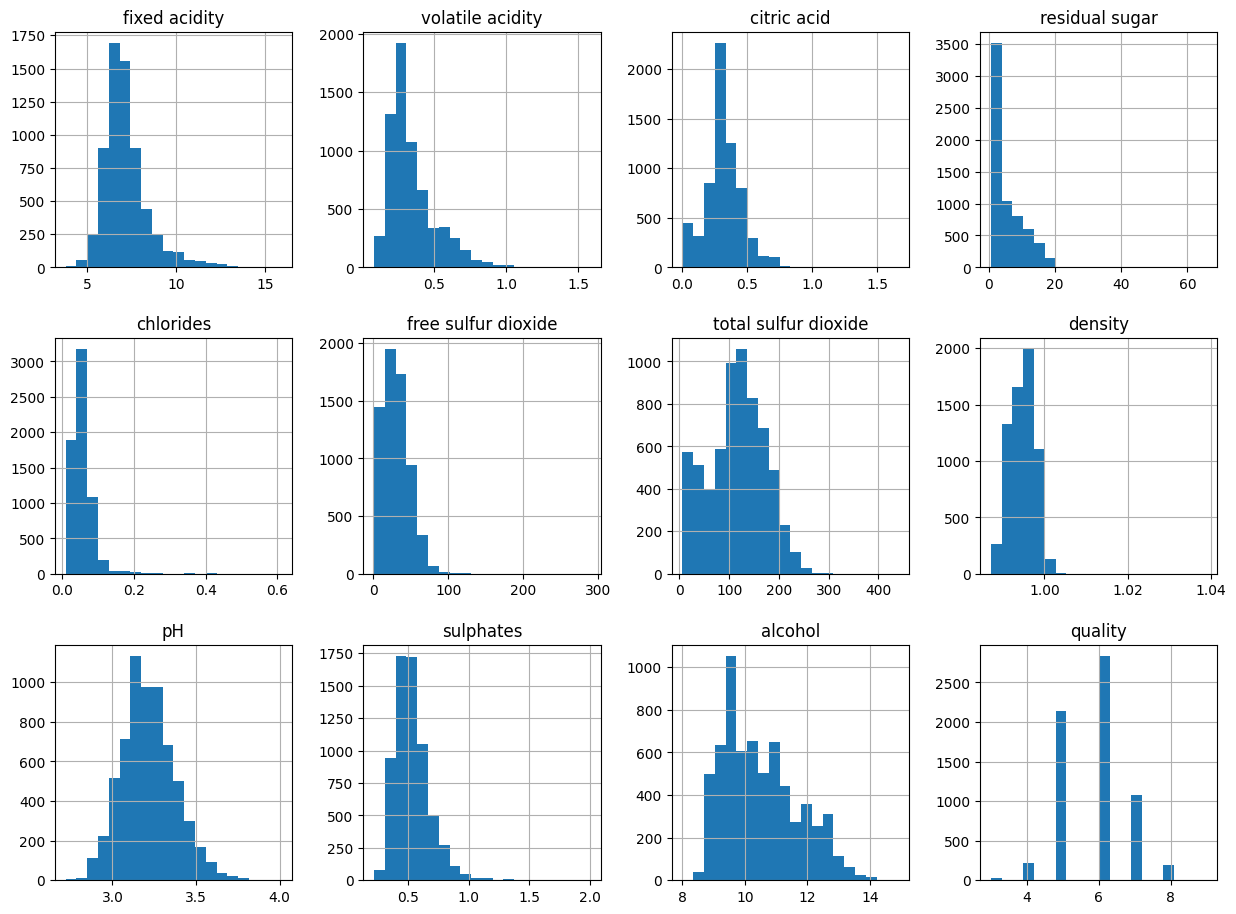

In [191]:
df.hist(figsize=(15,15), layout=(4,4), bins=20)

fixed acidity              Axes(0.125,0.747241;0.133621x0.132759)
volatile acidity        Axes(0.285345,0.747241;0.133621x0.132759)
citric acid              Axes(0.44569,0.747241;0.133621x0.132759)
residual sugar          Axes(0.606034,0.747241;0.133621x0.132759)
chlorides               Axes(0.766379,0.747241;0.133621x0.132759)
free sulfur dioxide        Axes(0.125,0.587931;0.133621x0.132759)
total sulfur dioxide    Axes(0.285345,0.587931;0.133621x0.132759)
density                  Axes(0.44569,0.587931;0.133621x0.132759)
pH                      Axes(0.606034,0.587931;0.133621x0.132759)
sulphates               Axes(0.766379,0.587931;0.133621x0.132759)
alcohol                    Axes(0.125,0.428621;0.133621x0.132759)
quality                 Axes(0.285345,0.428621;0.133621x0.132759)
dtype: object

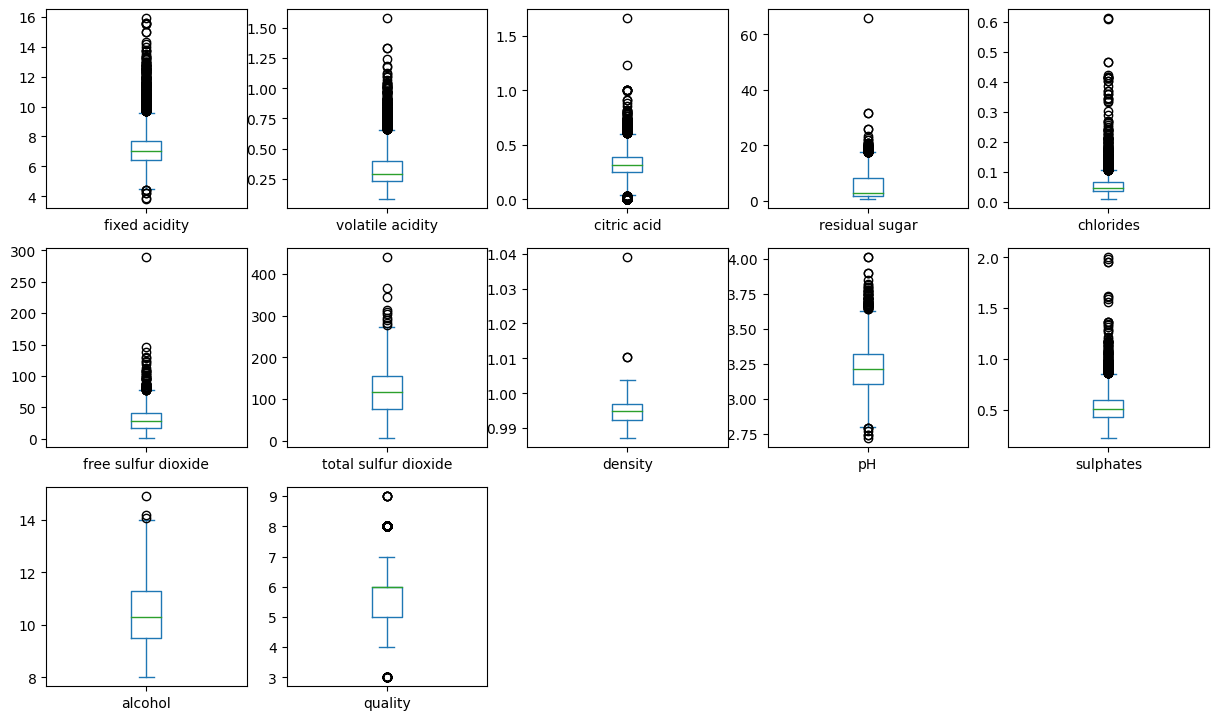

In [192]:
# buscar outliers con boxplots
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

/var/folders/gp/9l_7srgd2dx2mppp47fkwsd40000gn/T/ipykernel_3331/2378446390.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True,cmap = 'coolwarm')


<Axes: >

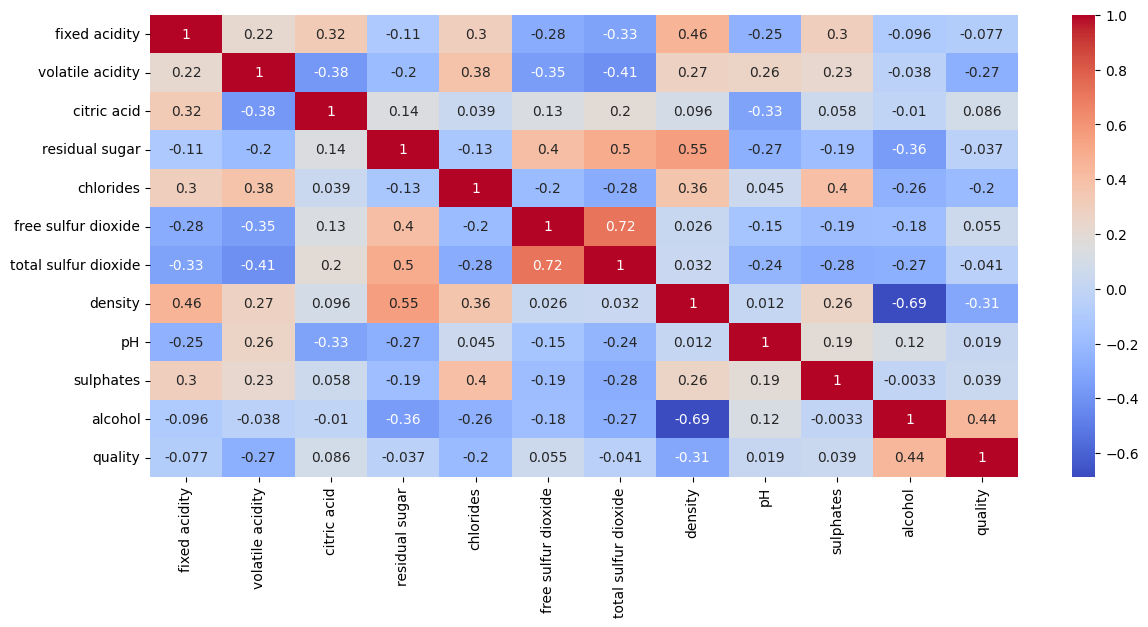

In [193]:
plt.figure(figsize=[14,6])
sns.heatmap(df.corr(), annot = True,cmap = 'coolwarm')

In [194]:
df = pd.get_dummies(df,drop_first=True)

In [196]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


### 1.1.3 Separación de conjuntos

> a) Separe el conjunto entre variables características y variable objetivo.

> b) Separe el conjunto de datos en un conjunto de entrenamiento y conjunto de prueba, utilizando una proporción 80%-20% respectivamente.

> c) Una vez separado los conjuntos, obtenga la media de cada variable con datos faltantes en el conjunto de **entrenamiento** y reemplace los valores faltantes (NaN) de ambos conjuntos (entrenamiento y prueba) con dicha media.

In [197]:
X = df.drop(['quality'], axis =1)

In [198]:
y = df['quality']

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [200]:
X_train = X_train.fillna(X.median())
X_test = X_test.fillna(X.median())

In [201]:
datainfo(X_train)

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
fixed acidity,float64,5197,104,0,0.0
volatile acidity,float64,5197,178,0,0.0
citric acid,float64,5197,87,0,0.0
residual sugar,float64,5197,292,0,0.0
chlorides,float64,5197,203,0,0.0
free sulfur dioxide,float64,5197,126,0,0.0
total sulfur dioxide,float64,5197,268,0,0.0
density,float64,5197,943,0,0.0
pH,float64,5197,107,0,0.0
sulphates,float64,5197,108,0,0.0


In [202]:
datainfo(X_test)

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
fixed acidity,float64,1300,81,0,0.0
volatile acidity,float64,1300,118,0,0.0
citric acid,float64,1300,77,0,0.0
residual sugar,float64,1300,223,0,0.0
chlorides,float64,1300,131,0,0.0
free sulfur dioxide,float64,1300,94,0,0.0
total sulfur dioxide,float64,1300,241,0,0.0
density,float64,1300,534,0,0.0
pH,float64,1300,88,0,0.0
sulphates,float64,1300,85,0,0.0


> d) Estandarice las variables categóricas numéricas no binarias, es decir, todas excepto el tipo de vino y la variable objetivo.

In [208]:
X_scaler = preprocessing.StandardScaler()
y_scaler = preprocessing.StandardScaler()


cols_to_normalize = ['fixed acidity',
                     'volatile acidity',
                     'citric acid',	
                     'residual sugar',
                     'chlorides',
                     'free sulfur dioxide',
                     'total sulfur dioxide',
                     'density',
                     'pH',
                     'sulphates',
                     'alcohol']

X_train[cols_to_normalize]= X_scaler.fit_transform(X_train[cols_to_normalize])
X_test[cols_to_normalize] = X_scaler.transform(X_test[cols_to_normalize])
y_train = y_scaler.fit_transform(np.array(y_train).reshape(-1,1))

e) Grafique la relevancia de cada variable con respecto a la variable objetivo utilizando la información mutua entre ambas, en otras palabras: MutualInformation($x_i,y$) siendo $x_i$ la $i$-ésima variable.

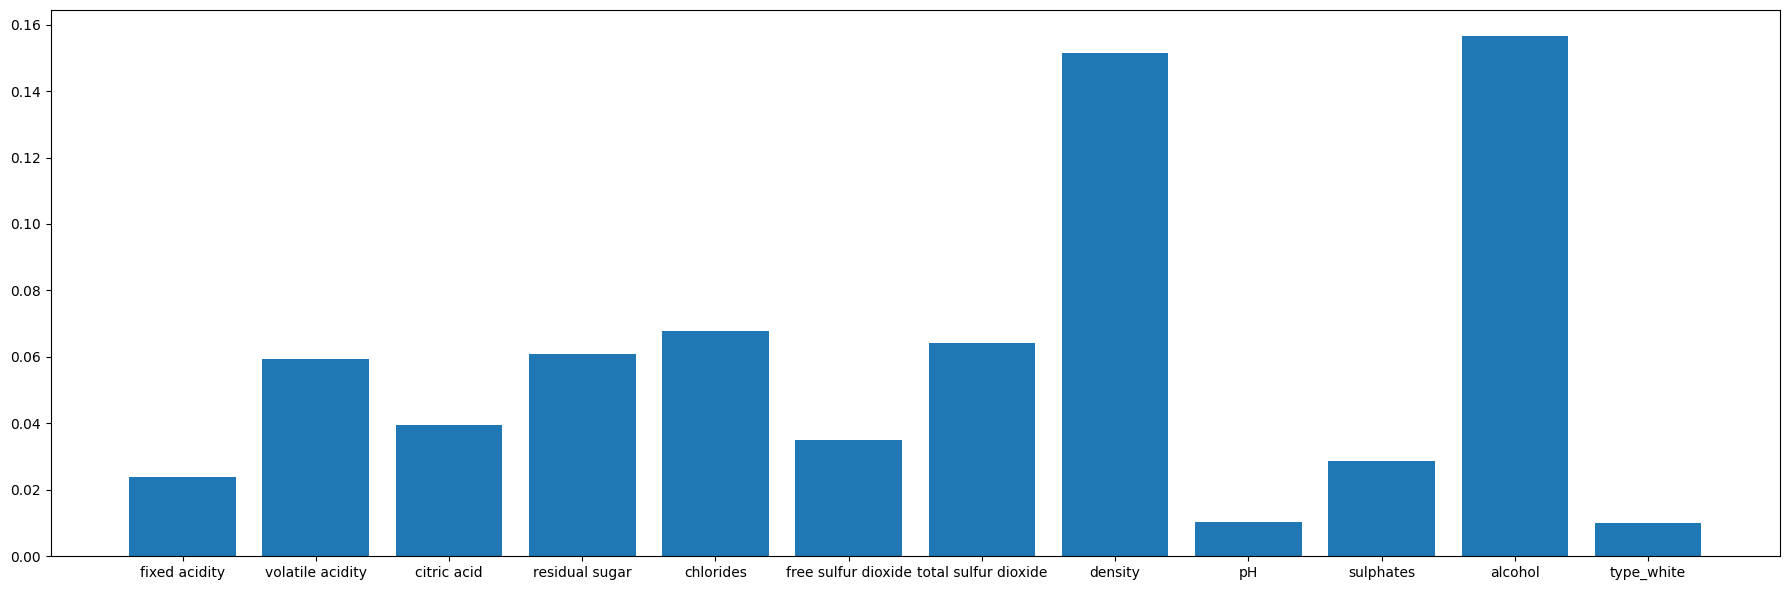

In [214]:
from sklearn.feature_selection import mutual_info_regression

mi =mutual_info_regression(X_train, y_train.ravel())
for i in range(100):
    mi +=mutual_info_regression(X_train, y_train.ravel())
labels = X_train.columns

fig, ax = plt.subplots(1, 1, figsize=(18,6),)
ax.bar(labels, mi/101.0)
fig.tight_layout()
plt.show()

> f) Cree un segundo conjunto quitando las características que menos aportan información según lo observado en su gráfico de la pregunta anterior. El número de características a quitar es algo que usted deberá escoger y argumentar por qué lo escogió. En adelante al conjunto con todas las variables lo llamaremos conjunto $\textit{A}$ y al nuevo conjunto creado con las características quitadas lo llamaremos conjunto $\textit{B}$.


Debido a que en cada ejecucion de la funcion obtenemos ponderaciones ligeramente distintas, la mejor forma de encontrar este k es calcular el promedio de la informacion mutua de cada variables despues de varias ejecuciones, aca de aplica la ley de los grandes numeros para justificar que estos son los verdaderos valores. Con esto es mente, se observa que 3 de las variables son las que tienen el menor valor, por ello se eligio un $k=3$.

In [216]:
A = (X_train, y_train, X_test, y_test)
#A = (X_train_b, y_train_b, X_test_b, y_test_b)


## CODIGO EXTRAIDO DE LA TAREA 1
k = 3
n = len(mi) - k
sorted_indices = np.argsort(mi)
selected_indices = sorted_indices[-n:]
selected_x_train = X_train.iloc[:, selected_indices]
selected_x_test = X_test.iloc[:, selected_indices]
X_train_b = selected_x_train.copy()
X_test_b = selected_x_test.copy()

B = (X_train_b, y_train, X_test_b, y_test)

In [217]:
B[0].head()

,sulphates,free sulfur dioxide,citric acid,volatile acidity,residual sugar,total sulfur dioxide,chlorides,density,alcohol
1161,-1.031727,-0.429669,-0.194486,-0.242373,2.399836,0.346154,-0.061802,1.693429,-1.255901
4652,-0.213691,1.646084,1.049167,0.242245,-0.847580,1.678508,-0.147467,-0.537391,-0.751343
6417,0.331666,-0.948608,-1.645414,2.180719,-0.595353,-1.572435,1.423058,0.646174,-0.246785
406,-0.963557,0.550548,0.150973,-0.363528,-0.301089,-0.293376,-0.718567,-1.697684,1.939633
2929,-0.213691,0.492888,-0.194486,-0.726992,1.884874,0.044154,-0.290242,1.208035,-1.171808


## 1.2 Modelos de Regresión

Para las siguientes preguntas usted debera entrenar, validar y evaluar los modelos utilizando los conjuntos $A$ y $B$ por separado, para luego hacer las respectivas comparaciones entre ambos. Cada modelo tiene sus propios hiperparámetros que usted deberá ajustar a través de una búsqueda en grilla, obteniendo así un conjunto de modelos distintos para posteriormente comparar las métricas de evaluación sobre el conjunto de prueba. Usted estará explorando un subconjunto del espacio de hipótesis variando los hiperparámetros que se le indiquen en cada modelo usando el módulo gridsearchcv de la librería sklearn. En el módulo gridsearchcv fije fije los parámetros de la forma: 

In [ ]:
GridSearchCV(estimator, param_grid, scoring=mean_squared_error, refit=True)

Siendo estimator el modelo a utilizar, scoring, la métrica para evaluar el modelo y refit=True para una vez probado todo el subconjunto del espacio de hipótesis, escojer el mejor modelo y entrnarlo con todo el conjunto de entrenamiento.

**Nota:** puede utilizar parte del código utilizado en la tarea 1 de esta asignatura.

### 1.2.1 Árbol de regresión

Entrene un árbol de regresión manteniendo fijos por defecto los que no se mencionen y variando los siguientes parámetros utilizando el módulo gridsearchcv de la librería sklearn:

> a) max_depth: Probar con las profundidades 2, 20, 200. Describa brevemente qué es lo que significa modificar este hiperparámetro.

> b) max_leaf_nodes: Probar con los valores 10, 50, 100. Describa brevemente qué es lo que significa modificar este hiperparámetro.

Responda las siguientes preguntas:

> c) ¿Cuántos modelos de árboles de regresión le quedan en total?

> d) De todas las combinaciones que entrenó, ¿cual es la que mejores resultados le da? Para esta pregunta evalue el modelo con el conjunto de validación de la grilla utilizando la métrica de evaluación $mean\_squared\_error$.

**Nota:** Recuerde que estos experimentos debe realizarlos para ambas representaciones de los conjuntos ($A$ y $B$).



In [218]:
k = 5
cv_folds = KFold(n_splits=k, shuffle=True)
model1 = DecisionTreeRegressor()

param_grid = {'max_depth': [2, 20, 200], 
              'max_leaf_nodes': [10,50,100]
             }

hypereg = GridSearchCV(
    model1, 
    param_grid, 
    scoring='neg_mean_squared_error',              
    refit=True, 
    cv=cv_folds, 
    verbose=0, 
)


hypereg.fit(A[0], A[1])
pd.DataFrame(hypereg.cv_results_).sort_values('rank_test_score', ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.018201,0.000394,0.000980,0.000071,20,50,"{'max_depth': 20, 'max_leaf_nodes': 50}",-0.698797,-0.674768,-0.828858,-0.724310,-0.734497,-0.732246,0.052582,1
7,0.018259,0.000353,0.001049,0.000061,200,50,"{'max_depth': 200, 'max_leaf_nodes': 50}",-0.698797,-0.674768,-0.828858,-0.724310,-0.734497,-0.732246,0.052582,1
3,0.011284,0.000136,0.000981,0.000119,20,10,"{'max_depth': 20, 'max_leaf_nodes': 10}",-0.698352,-0.660515,-0.792367,-0.770934,-0.769096,-0.738253,0.050166,3
6,0.011146,0.000093,0.000860,0.000062,200,10,"{'max_depth': 200, 'max_leaf_nodes': 10}",-0.698352,-0.660515,-0.792367,-0.770934,-0.769096,-0.738253,0.050166,3
8,0.022062,0.000351,0.001068,0.000072,200,100,"{'max_depth': 200, 'max_leaf_nodes': 100}",-0.706089,-0.715256,-0.846818,-0.745279,-0.749593,-0.752607,0.049995,5
5,0.021970,0.000515,0.000983,0.000064,20,100,"{'max_depth': 20, 'max_leaf_nodes': 100}",-0.716641,-0.714796,-0.844674,-0.745279,-0.747414,-0.753761,0.047484,6
0,0.007362,0.002287,0.001079,0.000116,2,10,"{'max_depth': 2, 'max_leaf_nodes': 10}",-0.721422,-0.691955,-0.836740,-0.789392,-0.821679,-0.772238,0.056439,7
1,0.006213,0.000094,0.000917,0.000122,2,50,"{'max_depth': 2, 'max_leaf_nodes': 50}",-0.721422,-0.691955,-0.836740,-0.789392,-0.821679,-0.772238,0.056439,7
2,0.006268,0.000165,0.000917,0.000092,2,100,"{'max_depth': 2, 'max_leaf_nodes': 100}",-0.721422,-0.691955,-0.836740,-0.789392,-0.821679,-0.772238,0.056439,7


In [219]:
hypereg.best_estimator_, hypereg.best_params_

(DecisionTreeRegressor(max_depth=20, max_leaf_nodes=50),
 {'max_depth': 20, 'max_leaf_nodes': 50})

In [220]:
hypereg.fit(B[0], B[1])
pd.DataFrame(hypereg.cv_results_).sort_values('rank_test_score', ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.014718,0.000206,0.000757,0.000033,20,50,"{'max_depth': 20, 'max_leaf_nodes': 50}",-0.698820,-0.742167,-0.657641,-0.710369,-0.724687,-0.706737,0.028509,1
7,0.015101,0.000351,0.001010,0.000064,200,50,"{'max_depth': 200, 'max_leaf_nodes': 50}",-0.698820,-0.742167,-0.657641,-0.710369,-0.724687,-0.706737,0.028509,1
8,0.018101,0.000344,0.000844,0.000077,200,100,"{'max_depth': 200, 'max_leaf_nodes': 100}",-0.715557,-0.765812,-0.661511,-0.722390,-0.734429,-0.719940,0.033921,3
5,0.018114,0.000360,0.000917,0.000108,20,100,"{'max_depth': 20, 'max_leaf_nodes': 100}",-0.715557,-0.761987,-0.667892,-0.722390,-0.734429,-0.720451,0.030695,4
3,0.009335,0.000074,0.000812,0.000076,20,10,"{'max_depth': 20, 'max_leaf_nodes': 10}",-0.733801,-0.793960,-0.667862,-0.723816,-0.745004,-0.732888,0.040468,5
6,0.009444,0.000120,0.000931,0.000153,200,10,"{'max_depth': 200, 'max_leaf_nodes': 10}",-0.733801,-0.793960,-0.667862,-0.723816,-0.745004,-0.732888,0.040468,5
1,0.005090,0.000035,0.000773,0.000119,2,50,"{'max_depth': 2, 'max_leaf_nodes': 50}",-0.764418,-0.834803,-0.707845,-0.750096,-0.789430,-0.769318,0.042108,7
0,0.005681,0.000638,0.000959,0.000116,2,10,"{'max_depth': 2, 'max_leaf_nodes': 10}",-0.764418,-0.834803,-0.707845,-0.750096,-0.789430,-0.769318,0.042108,8
2,0.005015,0.000038,0.000671,0.000006,2,100,"{'max_depth': 2, 'max_leaf_nodes': 100}",-0.764418,-0.834803,-0.707845,-0.750096,-0.789430,-0.769318,0.042108,8


In [221]:
hypereg.best_estimator_, hypereg.best_params_

(DecisionTreeRegressor(max_depth=20, max_leaf_nodes=50),
 {'max_depth': 20, 'max_leaf_nodes': 50})

> c) Entrene el conjunto de entrenamiento completo con el mejor modelo y mejor representación ($A$ o $B$) obtenida y evalúe su desempeño sobre el conjunto de prueba utilizando la métrica de evaluación $mean\_squared\_error$.

El mejor modelo es el con una profundidad maxima de 20 y un numero maximo de 50 hojas con la representacion B.

In [223]:
model1_best = DecisionTreeRegressor(max_depth= 20, max_leaf_nodes= 50)
model1_best.fit(B[0], B[1])
y_pred = y_scaler.inverse_transform(np.array(model1_best.predict(B[2])).reshape(-1, 1))
print(mean_squared_error(y_test, y_pred))

0.7101105348100054


### 1.2.2 Random Forest Regressor

Entrene un bosque aleatorio de regresión manteniendo fijos por defecto los que no se mencionen y variando los siguientes parámetros utilizando el módulo gridsearchcv de la librería sklearn:

* max_depth: Probar con las profundidades 2, 20, 200. Describa brevemente qué es lo que significa modificar este hiperparámetro.

* max_samples: Probar con las siguientes proporciones 0.1, 0.5, 1.0. Describa brevemente qué es lo que significa modificar este hiperparámetro.

El objetivo de los métodos $\textit{ensemble machine}$ es combinar las predicciones de varios estimadores base construidos con un algoritmo de aprendizaje determinado para mejorar la capacidad de generalización / robustez respecto a un único estimador. Se suelen distinguir dos familias de métodos ensemble: los métodos $averaging$ y los métodos $boosting$. Respecto a lo anterior responda las siguientes preguntas:

> a) Defina con sus propias palabras qué son y en qué se diferencian los métodos $averaging$ y $boosting$.

> b) A cual de los dos anteriormente definidos pertenece el modelo de regresión Random Forest?

> c) De todas las combinaciones que entrenó, ¿cual es la que mejores resultados le da? Para esta pregunta evalue el modelo con el conjunto de validación utilizando la métrica de evaluación $mean\_squared\_error$.

In [225]:
from sklearn.ensemble import RandomForestRegressor

k = 5
cv_folds = KFold(n_splits=k, shuffle=True)
model2 = RandomForestRegressor(random_state=0)

param_grid = {'max_depth': [2, 20, 200], 
              'max_samples': [0.1,0.5,1.0]
             }

hypereg = GridSearchCV(
    model2, 
    param_grid, 
    scoring='neg_mean_squared_error',              
    refit=True, 
    cv=cv_folds, 
    verbose=0, 
)


hypereg.fit(A[0], A[1].ravel())
pd.DataFrame(hypereg.cv_results_).sort_values('rank_test_score', ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_samples,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,2.312246,0.059520,0.022289,0.000428,200,1.0,"{'max_depth': 200, 'max_samples': 1.0}",-0.462834,-0.539368,-0.523931,-0.504222,-0.545886,-0.515248,0.029882,1
5,2.390031,0.160468,0.022957,0.001394,20,1.0,"{'max_depth': 20, 'max_samples': 1.0}",-0.464062,-0.540724,-0.525473,-0.507695,-0.547271,-0.517045,0.029799,2
7,1.426188,0.070317,0.020861,0.001091,200,0.5,"{'max_depth': 200, 'max_samples': 0.5}",-0.494532,-0.551865,-0.568968,-0.524145,-0.575915,-0.543085,0.030136,3
4,1.389991,0.010659,0.020232,0.000110,20,0.5,"{'max_depth': 20, 'max_samples': 0.5}",-0.496250,-0.553417,-0.566715,-0.523582,-0.578264,-0.543646,0.029917,4
3,0.333002,0.003468,0.015757,0.000185,20,0.1,"{'max_depth': 20, 'max_samples': 0.1}",-0.567482,-0.636303,-0.654591,-0.599127,-0.641721,-0.619845,0.032024,5
6,0.330319,0.005085,0.015729,0.000100,200,0.1,"{'max_depth': 200, 'max_samples': 0.1}",-0.567542,-0.636303,-0.654590,-0.599127,-0.641822,-0.619877,0.032019,6
0,0.134982,0.012935,0.007437,0.000454,2,0.1,"{'max_depth': 2, 'max_samples': 0.1}",-0.680284,-0.742849,-0.769173,-0.720699,-0.741874,-0.730976,0.029645,7
1,0.303190,0.016350,0.007343,0.000373,2,0.5,"{'max_depth': 2, 'max_samples': 0.5}",-0.701682,-0.750912,-0.782462,-0.739409,-0.750661,-0.745025,0.025993,8
2,0.420426,0.005920,0.007020,0.000161,2,1.0,"{'max_depth': 2, 'max_samples': 1.0}",-0.707687,-0.757040,-0.792226,-0.750976,-0.757193,-0.753025,0.026944,9


In [226]:
hypereg.best_estimator_, hypereg.best_params_

(RandomForestRegressor(max_depth=200, max_samples=1.0, random_state=0),
 {'max_depth': 200, 'max_samples': 1.0})

In [227]:
hypereg.fit(B[0], B[1].ravel())
pd.DataFrame(hypereg.cv_results_).sort_values('rank_test_score', ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_samples,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,1.848699,0.009378,0.022158,0.000101,200,1.0,"{'max_depth': 200, 'max_samples': 1.0}",-0.533486,-0.477882,-0.533251,-0.535193,-0.501136,-0.516190,0.023002,1
5,1.836574,0.008933,0.021913,0.000186,20,1.0,"{'max_depth': 20, 'max_samples': 1.0}",-0.534055,-0.482763,-0.532694,-0.535186,-0.505356,-0.518011,0.020835,2
7,1.127606,0.004039,0.020398,0.000102,200,0.5,"{'max_depth': 200, 'max_samples': 0.5}",-0.551209,-0.517917,-0.549139,-0.554768,-0.525484,-0.539703,0.015001,3
4,1.121999,0.005181,0.020273,0.000100,20,0.5,"{'max_depth': 20, 'max_samples': 0.5}",-0.550981,-0.517407,-0.550107,-0.554948,-0.527970,-0.540283,0.014839,4
6,0.278721,0.001702,0.015520,0.000172,200,0.1,"{'max_depth': 200, 'max_samples': 0.1}",-0.614458,-0.617603,-0.626954,-0.635016,-0.619219,-0.622650,0.007427,5
3,0.278460,0.002100,0.015773,0.000201,20,0.1,"{'max_depth': 20, 'max_samples': 0.1}",-0.614245,-0.617939,-0.627161,-0.635059,-0.619048,-0.622690,0.007485,6
0,0.121763,0.008327,0.007069,0.000102,2,0.1,"{'max_depth': 2, 'max_samples': 0.1}",-0.703780,-0.730787,-0.721471,-0.757889,-0.733017,-0.729389,0.017584,7
1,0.257818,0.007233,0.007348,0.000614,2,0.5,"{'max_depth': 2, 'max_samples': 0.5}",-0.714211,-0.742348,-0.734737,-0.764942,-0.751369,-0.741522,0.016959,8
2,0.351503,0.001056,0.006826,0.000098,2,1.0,"{'max_depth': 2, 'max_samples': 1.0}",-0.721753,-0.750225,-0.742058,-0.770994,-0.762500,-0.749506,0.017069,9


In [228]:
hypereg.best_estimator_, hypereg.best_params_

(RandomForestRegressor(max_depth=200, max_samples=1.0, random_state=0),
 {'max_depth': 200, 'max_samples': 1.0})

In [229]:
model2_best = RandomForestRegressor(random_state=0, max_depth=200 , max_samples= 1.0)
model2_best.fit(A[0], A[1].ravel())

y_pred = y_scaler.inverse_transform(np.array(model2_best.predict(A[2])).reshape(-1, 1))
print(mean_squared_error(y_test, y_pred))

0.5118592329608233


### 1.2.3 Bagging Regressor

Entrene un Bagging regresor utilizando como estimador (parámetro $estimator$) el mejor árbol de decisión obtenido en la pregunta 1.2.1, variando los siguientes parámetros utilizando el módulo gridsearchcv de la librería sklearn:

* n_estimators: Probar con 10, 100, 1000 estimadores. Describa brevemente qué es lo que significa modificar este hiperparámetro.

* max_samples: Probar con las siguientes proporciones 0.1, 0.5, 1.0. Describa brevemente qué es lo que significa modificar este hiperparámetro.

Responda las siguientes preguntas

> a) ¿Cómo funciona el modelo Bagging?

> b) A qué familia de métodos pertenece el Bagging regresor: $averaging$ o $boosting$.

> c) De todas las combinaciones que entrenó, ¿cual es la que mejores resultados le da? Para esta pregunta evalue el modelo con el conjunto de validación utilizando la métrica de evaluación $mean\_squared\_error$.

In [232]:
from sklearn.ensemble import BaggingRegressor

model3 = BaggingRegressor(estimator = DecisionTreeRegressor(max_depth= 20, max_leaf_nodes= 50))

k = 5
cv_folds = KFold(n_splits=k, shuffle=True)

param_grid = {'n_estimators': [10,100,1000], 
              'max_samples': [0.1,0.5,1.0]
             }

hypereg = GridSearchCV(
    model3, 
    param_grid, 
    scoring='neg_mean_squared_error',              
    refit=True, 
    cv=cv_folds, 
    verbose=0, 
)

In [233]:
print('###########################')
print('Resultados para A:')
hypereg.fit(A[0], A[1].ravel())
pd.DataFrame(hypereg.cv_results_).sort_values('rank_test_score', ascending=True)

###########################
Resultados para A:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,8.721618,0.237445,0.129016,0.002000,0.5,1000,"{'max_samples': 0.5, 'n_estimators': 1000}",-0.615996,-0.622490,-0.619539,-0.627009,-0.616083,-0.620223,0.004163,1
8,12.599317,0.077772,0.129265,0.002104,1.0,1000,"{'max_samples': 1.0, 'n_estimators': 1000}",-0.614838,-0.625676,-0.620636,-0.625648,-0.619436,-0.621247,0.004092,2
4,0.907300,0.047933,0.015166,0.002448,0.5,100,"{'max_samples': 0.5, 'n_estimators': 100}",-0.614277,-0.627666,-0.619145,-0.630000,-0.622822,-0.622782,0.005684,3
7,1.281247,0.046075,0.014127,0.000377,1.0,100,"{'max_samples': 1.0, 'n_estimators': 100}",-0.615778,-0.627712,-0.622575,-0.629843,-0.621010,-0.623384,0.004992,4
2,3.159720,0.169438,0.133334,0.002464,0.1,1000,"{'max_samples': 0.1, 'n_estimators': 1000}",-0.626795,-0.638477,-0.627638,-0.637635,-0.615219,-0.629153,0.008496,5
6,0.126029,0.001520,0.002304,0.000070,1.0,10,"{'max_samples': 1.0, 'n_estimators': 10}",-0.632381,-0.640095,-0.624605,-0.630963,-0.636146,-0.632838,0.005198,6
1,0.310141,0.003927,0.014533,0.000342,0.1,100,"{'max_samples': 0.1, 'n_estimators': 100}",-0.626294,-0.638178,-0.633553,-0.645233,-0.623420,-0.633336,0.007911,7
3,0.088538,0.001536,0.002397,0.000048,0.5,10,"{'max_samples': 0.5, 'n_estimators': 10}",-0.628837,-0.638401,-0.631251,-0.653885,-0.626356,-0.635746,0.009921,8
0,0.034641,0.002026,0.002907,0.000750,0.1,10,"{'max_samples': 0.1, 'n_estimators': 10}",-0.684214,-0.689777,-0.698350,-0.709305,-0.649724,-0.686274,0.020143,9


In [234]:
print(hypereg.best_estimator_, hypereg.best_params_)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20,
                                                 max_leaf_nodes=50),
                 max_samples=0.5, n_estimators=1000) {'max_samples': 0.5, 'n_estimators': 1000}


In [235]:
print('###########################')
print('Resultados para B:')
hypereg.fit(B[0], B[1].ravel())
pd.DataFrame(hypereg.cv_results_).sort_values('rank_test_score', ascending=True)

###########################
Resultados para B:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,7.121638,0.047954,0.125955,0.001230,0.5,1000,"{'max_samples': 0.5, 'n_estimators': 1000}",-0.618130,-0.636773,-0.628303,-0.611489,-0.634120,-0.625763,0.009587,1
8,10.570777,0.336696,0.126889,0.002473,1.0,1000,"{'max_samples': 1.0, 'n_estimators': 1000}",-0.619226,-0.635179,-0.633503,-0.610715,-0.636038,-0.626932,0.010163,2
4,0.713007,0.005560,0.013466,0.000162,0.5,100,"{'max_samples': 0.5, 'n_estimators': 100}",-0.620657,-0.633163,-0.631111,-0.615512,-0.638677,-0.627824,0.008486,3
7,1.045694,0.008867,0.013553,0.000256,1.0,100,"{'max_samples': 1.0, 'n_estimators': 100}",-0.620075,-0.635779,-0.636967,-0.618279,-0.636537,-0.629527,0.008479,4
2,2.603486,0.010456,0.130738,0.001389,0.1,1000,"{'max_samples': 0.1, 'n_estimators': 1000}",-0.629416,-0.643682,-0.627452,-0.617422,-0.639319,-0.631458,0.009257,5
3,0.072412,0.001194,0.002187,0.000056,0.5,10,"{'max_samples': 0.5, 'n_estimators': 10}",-0.638388,-0.645700,-0.646358,-0.621134,-0.636661,-0.637648,0.009110,6
1,0.262408,0.001569,0.013672,0.000268,0.1,100,"{'max_samples': 0.1, 'n_estimators': 100}",-0.639797,-0.656615,-0.635385,-0.626011,-0.643239,-0.640209,0.010034,7
6,0.105964,0.001310,0.002295,0.000071,1.0,10,"{'max_samples': 1.0, 'n_estimators': 10}",-0.633759,-0.654482,-0.640704,-0.618238,-0.655681,-0.640573,0.013907,8
0,0.028285,0.001327,0.002283,0.000098,0.1,10,"{'max_samples': 0.1, 'n_estimators': 10}",-0.689936,-0.702724,-0.684649,-0.688255,-0.666948,-0.686502,0.011522,9


In [236]:
print(hypereg.best_estimator_, hypereg.best_params_)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20,
                                                 max_leaf_nodes=50),
                 max_samples=0.5, n_estimators=1000) {'max_samples': 0.5, 'n_estimators': 1000}


In [238]:
model3_best = BaggingRegressor(estimator = DecisionTreeRegressor(max_depth= 20, max_leaf_nodes= 50),
                         n_estimators = 1000, max_samples = 0.5)

model3_best.fit(A[0], A[1].ravel())

y_pred = y_scaler.inverse_transform(np.array(model3_best.predict(A[2])).reshape(-1, 1))
print(mean_squared_error(y_test, y_pred))

0.6332715540446888


## 1.3 Conclusiones

Comente con qué modelo y representación obtiene los mejores resultados, ¿qué otros experimentos realizaría para intentar mejorar los resultados?

# 2. Reconocimiento de actividad humana mediante sensores de movimiento.

Los conjuntos de datos provienen del UCI Machine Learning Repository. En este conjuntos de datos cada persona realizó seis actividades (CWALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) llevando un smartphone en la cintura. Utilizando su acelerómetro y giroscopio integrados, capturamos la aceleración lineal de 3 ejes y la velocidad angular de 3 ejes a una frecuencia constante de 50 Hz. El conjunto de datos obtenido se ha dividido aleatoriamente en dos conjuntos, de los que se seleccionó el 70% de los voluntarios para generar los datos de entrenamiento y el 30% los datos de prueba.

<center><img src="https://imgtr.ee/images/2023/06/04/bSx54.jpg" alt="bSx54.jpg" border="0" width="480" height="480" /></center>

Para esta pregunta nos centraremos en la tarea de clasificación de actividades (variable objetivo) según los datos de movimiento proporcionados por los sensores (atributos).

Para cada registro en el conjunto de datos nos centraremos en:
* Aceleración triaxial del acelerómetro (aceleración total) y la aceleración estimada del cuerpo.
* Velocidad angular triaxial del giroscopio.

* Su etiqueta de actividad.

Para obtener el dataset, artículos publicados y más información, por favor dirigirse al siguiente [link](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones).



## 2.1 Obtención, manipulación y exploración del conjunto de datos

Con el link proporcionado arriba, haga click en Data Folders y luego en *UCI HAR Dataset.names* para obtener una guía acerca de la estructura de los directorios. Descargue, descomprima los datos y explore la estructura de los directorios (*UCI HAR Dataset.zip*).

Para esta oportunidad solo nos centraremos en los dato que se encuentran en las carpetas *Inertial Signals*, para entrenamiento y pruebas.

### 2.1.1 Exploración del conjunto de datos

Una vez comprendida la estructura de los directorios, asegurese de poder navegar por los archivos correctamente:

> a) El código a continuación debe imprimir las rutas a todos los archivos del conjunto de datos que usted acaba de descargar. Ejemplo: /su ruta/UCI HAR Dataset/train/Inertial Signals/body_acc_z_train.txt

In [3]:
import os

for dirname, _, filenames in os.walk('human+activity+recognition+using+smartphones/UCI HAR Dataset/train/Inertial Signals'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

human+activity+recognition+using+smartphones/UCI HAR Dataset/train/Inertial Signals/body_gyro_z_train.txt
human+activity+recognition+using+smartphones/UCI HAR Dataset/train/Inertial Signals/body_acc_y_train.txt
human+activity+recognition+using+smartphones/UCI HAR Dataset/train/Inertial Signals/total_acc_z_train.txt
human+activity+recognition+using+smartphones/UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt
human+activity+recognition+using+smartphones/UCI HAR Dataset/train/Inertial Signals/body_gyro_x_train.txt
human+activity+recognition+using+smartphones/UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt
human+activity+recognition+using+smartphones/UCI HAR Dataset/train/Inertial Signals/body_gyro_y_train.txt
human+activity+recognition+using+smartphones/UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt
human+activity+recognition+using+smartphones/UCI HAR Dataset/train/Inertial Signals/body_acc_z_train.txt


In [4]:
LABELS = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
SIGNALS = ["body_acc_x_", "body_acc_y_", "body_acc_z_",
           "body_gyro_x_", "body_gyro_y_", "body_gyro_z_",
           "total_acc_x_", "total_acc_y_", "total_acc_z_"]

> b) Obtenga la ruta exacta de los archivos e insertelos en una lista (entrenamiento y prueba ). El código a continuación es solo una sugerencia, usted puede optimizar y modificarlo.

In [13]:
train_paths = ['human+activity+recognition+using+smartphones/UCI HAR Dataset/train/Inertial Signals/' + signal + 'train.txt' for signal in SIGNALS]
test_paths = ['human+activity+recognition+using+smartphones/UCI HAR Dataset/test/Inertial Signals/' + signal + 'test.txt' for signal in SIGNALS]

> c) Cree una función __load_X que reciba una lista de rutas como alguna de las anteriormente creadas, y retorne un arreglo de numpy con las siguientes dimensiones (n_samples, signal_len, sensor) donde:
* n_samples: es el tamaño de la muestra, o sea, el total de experimentos.
* signal_len: es el largo de la señal de los sensores.
* sensor: es el sensor o el eje del sensor el cual registra la señal, por ejemplo acelerómetro en el eje $y$.


In [36]:
def __load_X(X_signal_paths):
    X_signals = []    
    for route in X_signal_paths:
        X_signals.append( np.loadtxt(route).T )

    return np.array(X_signals).T

In [72]:
x_train = __load_X(train_paths)
x_test = __load_X(test_paths)

> d) Cargue las clases del conjunto de entrenamiento y pruebas en arreglos numpy.

In [73]:
y_train = np.loadtxt('human+activity+recognition+using+smartphones/UCI HAR Dataset/train/y_train.txt',  dtype=np.int32)
y_test = np.loadtxt('human+activity+recognition+using+smartphones/UCI HAR Dataset/test/y_test.txt', dtype=np.int32)

### 2.1.2 Análisis del conjunto de datos

Responda las siguientes preguntas:

> a) ¿Cuántos experimentos le quedan en el conjunto de entrenamiento y en el de test?

En el dataset de entrenamiento quedan 7352 experimentos, mientras que en el de test quedan 2947.

> b) ¿Qué valores obtiene para las dimensiones recién definidas (n_samples, signal_len, sensor)?

En el conjunto de entrenamiento tenemos $(7352, 128, 9)$ y en el de test $(2947, 128, 9)$

> c) Considerando todo lo que usted ha aprendido en este curso y en las tareas anteriores, ¿Qué puede decir de los atributos de este conjunto de datos?. Obtenga estadísticas descriptivas y sintetice brevemente con sus propias palabras lo que observe, apoyándose de gráficos como histográmas, boxplots heatmaps de correlación, etc.

> d) Si quisiera entrenar una red neuronal feedforward con este conjunto de datos, ¿cómo deben representarse las dimensiones de cada experimento (sample) para que sirvan de entrada para este tipo de red?

Cada sample tiene que ser unidimensional, es decir, tiene que ser un arreglo de caracteristicas, concentrandonos en esta tarea, en vez de ser $(128, 9)$, tiene que ser $(n,1)$.

> e) Modifique las dimensiones de los atributos para luego entrenar una red neuronal feedforward.

#### Matriz inicial

In [74]:
print("Dimension conjunto entrenamiento: ", x_train.shape)
print("Dimension conjunto test: ", x_test.shape)

Dimension conjunto entrenamiento:  (7352, 128, 9)
Dimension conjunto test:  (2947, 128, 9)


#### Graficos descriptivos

In [75]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1] * x_train.shape[2]))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1] * x_test.shape[2]))

> f) ¿Cómo quedó cada atributo ahora que modificó sus dimensiones?

En el conjunto de entrenamiento tenemos una dimension $(7352, 1152)$ y en el de test $(2947, 1152)$

In [76]:
print("Dimension conjunto entrenamiento: ", x_train.shape)
print("Dimension conjunto test: ", x_test.shape)

Dimension conjunto entrenamiento:  (7352, 1152)
Dimension conjunto test:  (2947, 1152)


### 2.1.3 Procesamiento del conjunto de datos

> a)Transforme las clases a One Hot Encoder

In [77]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse_output=False)

y_train_OHE = onehot_encoder.fit_transform(y_train.reshape(len(y_train), 1))
y_test_OHE = onehot_encoder.transform(y_test.reshape(len(y_test), 1))

# Print the original labels and the one-hot encoded labels
print("Original Labels:")
print(y_train.shape)
print("\nOne-Hot Encoded Labels:")
print(y_train_OHE.shape)

Original Labels:
(7352,)

One-Hot Encoded Labels:
(7352, 6)


In [78]:
LABELS[np.argmax(y_train_OHE[400])]

'SITTING'

> b) ¿Estan bien balanceadas las clases?

Se observa una leve diferencia, pero se puede decir que estan balanceadas

In [81]:
y_train_OHE[:5]

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]])

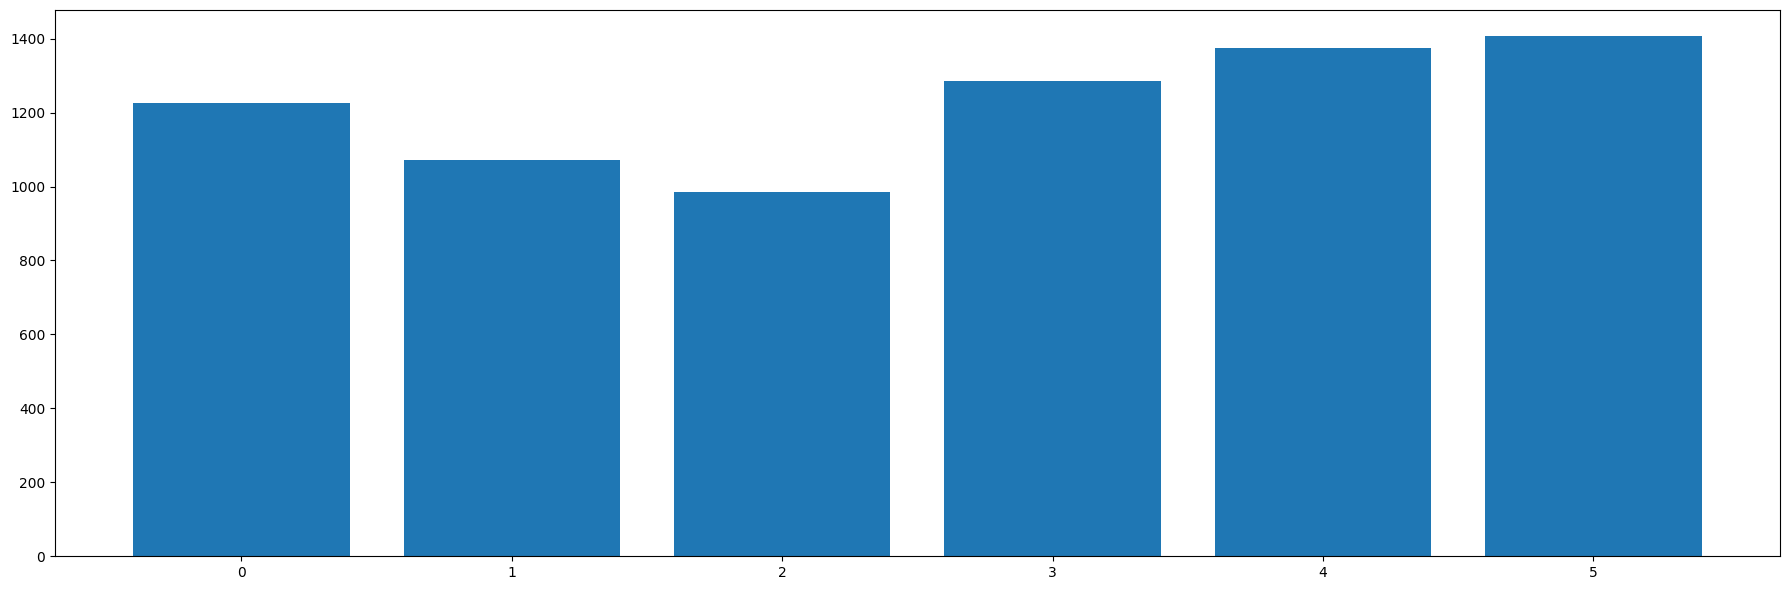

In [79]:
aux_y = y_train_OHE.T
fig, ax = plt.subplots(1, 1, figsize=(18,6),)
ax.bar(range(6), [np.sum(aux_y[i]) for i in range(6) ])
fig.tight_layout()
plt.show()

> c) Estandarice los atributos con media 0 y variaza 1.

In [80]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(x_train)

# Apply the scaler to transform the training data
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


## 2.2 Modelos de clasificación

### 2.2.1 Redes Neuronales

> a) ¿Cómo se entrena una red neuronal feedforward?

Las redes neuronales se entrenan ajuntando los pesos que conectan a cada una de las neuronas entre capas. Mientras la red extrae caracteristicas del conjunto de entrenamiento, esta va actualizando los pesos de las conexiones, de esta forma va a ajustandose a las caracteristicas del conjunto. 

> b) ¿Qué es una neurona en este contexto?



> c) ¿Qué es una función de activación y para que sirven?

Es un tipo de funcion que determina el output de una neurona dado un conjunto de valores. 


> d) ¿A qué se le llama capa densa?

> e) Si usted conoce la dimensión entrada, la de salida, la cantidad de capas y neuronas de cada capa, ¿cómo se calcula la cantidad de pesos de la red?

> f) ¿A qué se refiere el fenómeno de gradiente desvaneciente?, ¿y el gradiente explosivo?

> g) Para esta tarea, como debería ser la capa de salida de la red considerando que previemente aplicó una transformación One Hot Encoding a las clases del conjunto?

> h) Considere que la capa de entrada se llama "input_layer",  a la capa de salida le llamaremos "output_layer" y a las capas intermedias "hidden_layer(_units_, _activation_)" donde los parametros significan el numero de neuronas que tiene esa capa densa (Dense en Keras) y su activación. Cree las siguientes redes neuronales:

* input_layer -> output_layer

* input_layer -> hidden_layer(32, tanh) -> output_layer

* input_layer -> hidden_layer(32, sigmoid) -> output_layer

* input_layer -> hidden_layer(32, relu) -> output_layer

> i) Una vez creado el modelo, imprima el sumario (modelo.summary()) y compare los resultados obtenidos con su razonamiento explicado en la pregunta e).

In [90]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Input, Dropout, Flatten

input_layer = Input(shape = (x_train.shape[1:]))
output_layer = Dense(units=6, activation="softmax")(input_layer)
ANN = Model(inputs = input_layer , outputs = output_layer)

In [91]:
ANN.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1152)]            0         
                                                                 
 dense_18 (Dense)            (None, 6)                 6918      
                                                                 
Total params: 6918 (27.02 KB)
Trainable params: 6918 (27.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [84]:
input_layer = Input(shape = (x_train.shape[1:]))
layer_1 = Dense(units=32, activation="tanh")(input_layer)
output_layer = Dense(units=6, activation="softmax")(layer_1)
ANN_1 = Model(inputs = input_layer , outputs = output_layer)

In [85]:
ANN_1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1152)]            0         
                                                                 
 dense_12 (Dense)            (None, 32)                36896     
                                                                 
 dense_13 (Dense)            (None, 6)                 198       
                                                                 
Total params: 37094 (144.90 KB)
Trainable params: 37094 (144.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [86]:
input_layer = Input(shape = (x_train.shape[1:]))
layer_1 = Dense(units=32, activation="sigmoid")(input_layer)
output_layer = Dense(units=6, activation="softmax")(layer_1)
ANN_2 = Model(inputs = input_layer , outputs = output_layer)

In [87]:
ANN_2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1152)]            0         
                                                                 
 dense_14 (Dense)            (None, 32)                36896     
                                                                 
 dense_15 (Dense)            (None, 6)                 198       
                                                                 
Total params: 37094 (144.90 KB)
Trainable params: 37094 (144.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [88]:
input_layer = Input(shape = (x_train.shape[1:]))
layer_1 = Dense(units=32, activation="relu")(input_layer)
output_layer = Dense(units=6, activation="softmax")(layer_1)
ANN_3 = Model(inputs = input_layer , outputs = output_layer)

In [89]:
ANN_3.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1152)]            0         
                                                                 
 dense_16 (Dense)            (None, 32)                36896     
                                                                 
 dense_17 (Dense)            (None, 6)                 198       
                                                                 
Total params: 37094 (144.90 KB)
Trainable params: 37094 (144.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


 > j) Defina un callback de Early Stopping para evitar un sobre ajuste de la red basandose en sus respuestas a las siguientes preguntas:

* ¿Qué es lo que se debería monitorear para evitar el sobre ajuste en esta red?

Se tiene que monitorear las funciones de perdida, en concreto la del conjunto de validacion, ya que se busca que no ocurra un sobreajuste en el conjunto de entrenamiento que de una mala prediccion en el conjunto de validacion.

* ¿Qué es la paciencia en este contexto?

Es el numero de epocas que se pueden permitir cuando no se encuentran mejoras, es decir, cuando se encuentra en un punto sin mejoras de la variable monitoreada, se permiten ejecutar $n$ epocas más. 

* ¿Para qué se usa el parámetro min_delta?

Es el parametro que indica que es considerado como una mejora y que no. En otras palabras, corresponde al valor minimo que se puede obtener de la diferencia entre epocas de la variable monitoreada para ser considerado como una mejora.

> k) Compile el modelo usando como optimizador el gradiente descendente estocástico, utilice la métrica "categorical_accuracy" y responda lo siguiente:

* ¿Qúe función de pérdida se debe usar para este problema (loss)?

Como aca nos importa la correcta clasificacion, lo mas logico seria utilizar ''categorical_crossentropy''.

**Nota:** Si bien en un mundo ideal donde hay tiempo y recursos para explorar un subconjunto del espacio de hipótesis lo suficientemente amplio como para cubrir todas las posibles combinaciones de hiperparámetros, en esta tarea solo se explorarán algunos.

In [136]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',mode='max', verbose=1, patience=20)

> l) Entrene el modelo utilizando el callback definido en la pregunta anterior con 100 epochs,un batch_size=256, y validation split=0.1.

* ¿Qué significa el batch_size?

**Nota:** Por favor recuerde ocultar el output del entrenamiento!! Mantenga el orden de su tarea y justifique de forma óptima sus resultados.

In [137]:
ANN.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])
history0 = ANN.fit(x_train, y_train_OHE, 
                  batch_size=64*4, 
                  epochs=100,
                  validation_split=0.1,
                  callbacks=[early_stop], verbose=0)

Epoch 27: early stopping


In [138]:
ANN_1.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])
history_1 = ANN_1.fit(x_train, y_train_OHE, 
                  batch_size=64*4, 
                  epochs=100,
                  validation_split=0.1,
                  callbacks=[early_stop], verbose=0)

Epoch 21: early stopping


In [139]:
ANN_2.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])
history_2 = ANN_2.fit(x_train, y_train_OHE, 
                  batch_size=64*4, 
                  epochs=100,
                  validation_split=0.1,
                  callbacks=[early_stop], verbose=0)

Epoch 21: early stopping


In [140]:
ANN_3.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])
history_3 = ANN_3.fit(x_train, y_train_OHE, 
                  batch_size=64*4, 
                  epochs=100,
                  validation_split=0.1,
                  callbacks=[early_stop], verbose=0)

Epoch 21: early stopping


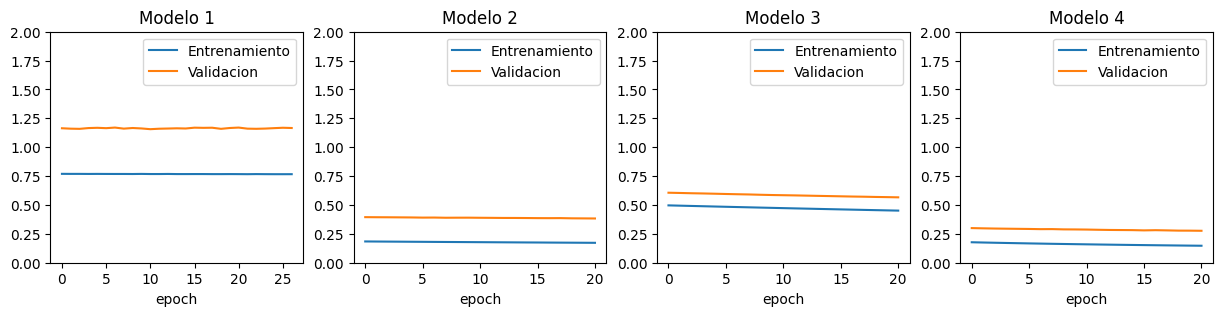

In [141]:
fig, ax = plt.subplots(1, 4, figsize=(15,3),)
aux = [history0, history_1, history_2, history_3]

for i in range(len(aux)):
    ax[i].plot(aux[i].history['loss'])
    ax[i].plot(aux[i].history['val_loss'])
    ax[i].legend(['Entrenamiento', 'Validacion'], loc='upper right')
    ax[i].set_ylim(0.0, 2)
    ax[i].set_xlabel('epoch')
    ax[i].set_title("Modelo "+str(i+1))
plt.show()

> m) Escoja el mejor modelo según la función de activación y puntuación obtenida en el conjunto de validación y pruebe con los siguientes modelos:

* input_layer -> hidden_layer(64, best_activ) -> hidden_layer(32, best_activ) -> output_layer

* input_layer -> hidden_layer(128, best_activ) -> hidden_layer(64, best_activ) -> hidden_layer(32, best_activ) -> output_layer

* input_layer -> hidden_layer(256, best_activ) -> hidden_layer(128, best_activ) -> hidden_layer(64, best_activ) -> hidden_layer(32, best_activ) -> output_layer


En base al grafico anterior, se puede observar que el mejor rendimiento lo entrega la funcion de activacion ''relu''.

In [142]:
input_layer = Input(shape = (x_train.shape[1:]))
layer_1 = Dense(units=64, activation="relu")(input_layer)
layer_2 = Dense(units=32, activation="relu")(layer_1)
output_layer = Dense(units=6, activation="softmax")(layer_2)
ANN_4 = Model(inputs = input_layer , outputs = output_layer)

input_layer = Input(shape = (x_train.shape[1:]))
layer_1 = Dense(units=128, activation="relu")(input_layer)
layer_2 = Dense(units=64, activation="relu")(layer_1)
layer_3 = Dense(units=32, activation="relu")(layer_2)
output_layer = Dense(units=6, activation="softmax")(layer_3)
ANN_5 = Model(inputs = input_layer , outputs = output_layer)

input_layer = Input(shape = (x_train.shape[1:]))
layer_1 = Dense(units=256, activation="relu")(input_layer)
layer_2 = Dense(units=128, activation="relu")(layer_1)
layer_3 = Dense(units=64, activation="relu")(layer_2)
layer_4 = Dense(units=32, activation="relu")(layer_3)
output_layer = Dense(units=6, activation="softmax")(layer_4)
ANN_6 = Model(inputs = input_layer , outputs = output_layer)

In [143]:
ANN_4.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])
history_4 = ANN_4.fit(x_train, y_train_OHE, 
                  batch_size=64*4, 
                  epochs=100,
                  validation_split=0.1,
                  callbacks=[early_stop], verbose=0)

Epoch 21: early stopping


In [144]:
ANN_5.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])
history_5 = ANN_5.fit(x_train, y_train_OHE, 
                  batch_size=64*4, 
                  epochs=100,
                  validation_split=0.1,
                  callbacks=[early_stop], verbose=0)

Epoch 21: early stopping


In [145]:
ANN_6.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])
history_6 = ANN_6.fit(x_train, y_train_OHE, 
                  batch_size=64*4, 
                  epochs=100,
                  validation_split=0.1,
                  callbacks=[early_stop], verbose=0)

Epoch 21: early stopping


>n) Imprima las curvas de error y accuracy del conjunto de entrenamiento y de validación para observar como se comporta el _aprendizaje_ de sus modelos.

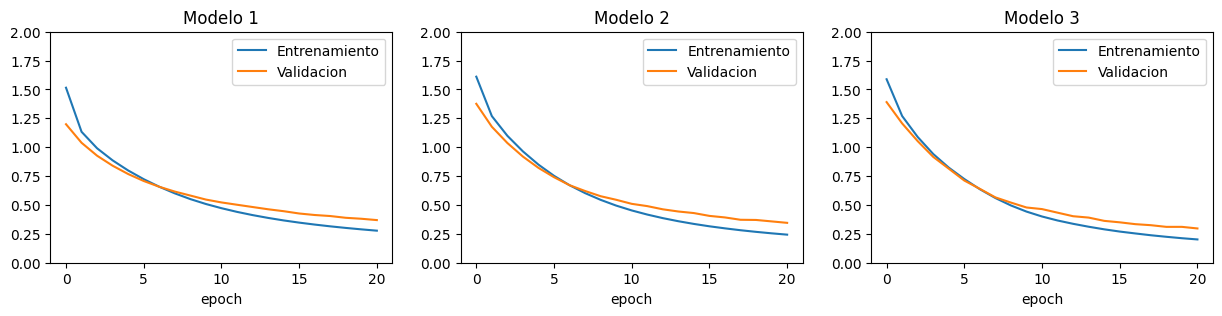

In [146]:
fig, ax = plt.subplots(1, 3, figsize=(15,3),)
aux = [history_4, history_5, history_6]

for i in range(len(aux)):
    ax[i].plot(aux[i].history['loss'])
    ax[i].plot(aux[i].history['val_loss'])
    ax[i].legend(['Entrenamiento', 'Validacion'], loc='upper right')
    ax[i].set_ylim(0.0, 2)
    ax[i].set_xlabel('epoch')
    ax[i].set_title("Modelo "+str(i+1))
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Access the training and validation errors from the history object
train_errors = history.history['accuracy']
val_errors = history.history['val_accuracy']

# Get the number of epochs
epochs = range(1, len(train_errors) + 1)

# Plotting the learning curves
plt.plot(epochs, train_errors, label='Training Accuracy')
plt.plot(epochs, val_errors, label='Validation Accuracy')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()

# Displaying the plot
plt.show()

> o) Una vez terminados los entrenamientos elija la mejor red hasta ahora y entrénela con el conjunto de entrenamiento completo sin validation split.

In [149]:
input_layer = Input(shape = (x_train.shape[1:]))
layer_1 = Dense(units=64, activation="relu")(input_layer)
layer_2 = Dense(units=32, activation="relu")(layer_1)
output_layer = Dense(units=6, activation="softmax")(layer_2)
ANN_4 = Model(inputs = input_layer , outputs = output_layer)

ANN_4.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])
history_4 = ANN_4.fit(x_train, y_train_OHE, 
                  batch_size=64*4, 
                  epochs=100,
                  callbacks=[], verbose=1)

Epoch 1/100
29/29 [==============================] - 0s 3ms/step - loss: 1.5754 - categorical_accuracy: 0.4415
Epoch 2/100
29/29 [==============================] - 0s 3ms/step - loss: 1.1453 - categorical_accuracy: 0.6200
Epoch 3/100
29/29 [==============================] - 0s 3ms/step - loss: 0.9650 - categorical_accuracy: 0.6882
Epoch 4/100
29/29 [==============================] - 0s 3ms/step - loss: 0.8420 - categorical_accuracy: 0.7357
Epoch 5/100
29/29 [==============================] - 0s 3ms/step - loss: 0.7479 - categorical_accuracy: 0.7666
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 0.6705 - categorical_accuracy: 0.7939
Epoch 7/100
29/29 [==============================] - 0s 3ms/step - loss: 0.6059 - categorical_accuracy: 0.8156
Epoch 8/100
29/29 [==============================] - 0s 3ms/step - loss: 0.5510 - categorical_accuracy: 0.8365
Epoch 9/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5041 - categorical_accuracy: 0.8519
E

> p) Procese las predicciones del modelo sobre el conjunto de test para que pueda comparar los errores usando un heatmap de la matriz de confusión.

In [150]:
y_pred = ANN_4(x_test)
y_pred = np.argmax(y_pred, axis=1)

In [151]:
y_test_comp = np.argmax(y_test_OHE, axis=1)

In [179]:
y_pred

array([4, 4, 4, ..., 1, 1, 1])

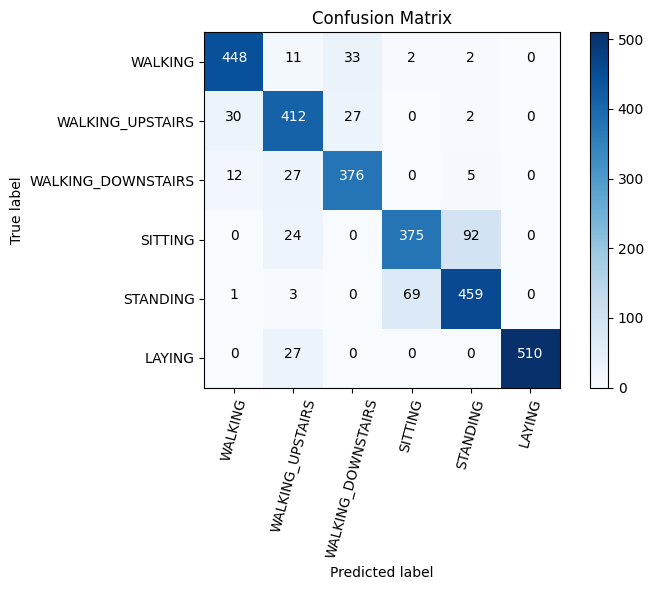

In [152]:
from sklearn.metrics import confusion_matrix

cat = np.array([1,2,3,4,5,6])

# Create the confusion matrix
cm = confusion_matrix(cat[y_test_comp], cat[y_pred])

# Get the number of classes
num_classes = 6

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add x-axis and y-axis labels
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, LABELS, rotation=75)
plt.yticks(tick_marks, LABELS)

# Add labels to each cell
thresh = cm.max() / 2.0
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

# Add axis labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Show the plot
plt.tight_layout()
plt.show()


> q) Comente acerca de los resultados y explique cual es la actividad que mejor logra clasificar la red.

La mejor caracteristica que puede clasificar es la de laying

### 2.2.2 AdaBoost y arbustos

> a) Describa brevemente como funciona el modelo AdaBoost.

> b) ¿Qué clasificador se puede usar junto con Adaboost?

> c) ¿Cómo funciona el _learning rate_ en el modelo AdaBoost?

> d) Separe el conjunto de entrenamiento dejando el 10% para validación.

> e) Entrene un clasificador AdaBoost con un arbusto (árbol de profundidad=2) con 300 estimadores y learning_rate=1

**Nota:** Este modelo no usa One Hot Encoder para las clases, investigue como preprocesar los datos del conjunto para entrenar este modelo. Puede guiarse con el siguiente tutorial de sklearn: https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_multiclass.html#sphx-glr-auto-examples-ensemble-plot-adaboost-multiclass-py



In [153]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

ada = AdaBoostClassifier( DecisionTreeClassifier(max_depth=2), n_estimators=300, learning_rate=1 )

In [159]:
ADAx_train, ADAx_val, ADAy_train, ADAy_val = train_test_split(x_train, y_train, test_size=0.1, train_size=0.9)
ada.fit(ADAx_train, ADAy_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1, n_estimators=300)

> f) Revise el error de validación con el conjunto de validaión.

In [161]:
ada_errors = []
ada_val_errors = []

for ada_val_predict in ada.staged_predict(ADAx_val):
    ada_val_errors.append(1.0 - accuracy_score(ada_val_predict, ADAy_val))    

n_trees_ada = len(ada)

In [162]:
print(ada_val_errors)

[0.5298913043478262, 0.32336956521739135, 0.3464673913043478, 0.32608695652173914, 0.3192934782608695, 0.29891304347826086, 0.3152173913043478, 0.31114130434782605, 0.30434782608695654, 0.3029891304347826, 0.3029891304347826, 0.30842391304347827, 0.31385869565217395, 0.31114130434782605, 0.3029891304347826, 0.3057065217391305, 0.2975543478260869, 0.2934782608695652, 0.29891304347826086, 0.30842391304347827, 0.31114130434782605, 0.32336956521739135, 0.3057065217391305, 0.3029891304347826, 0.3057065217391305, 0.30842391304347827, 0.30163043478260865, 0.3057065217391305, 0.3070652173913043, 0.29211956521739135, 0.29483695652173914, 0.2975543478260869, 0.2975543478260869, 0.2961956521739131, 0.2961956521739131, 0.3029891304347826, 0.28532608695652173, 0.2717391304347826, 0.27309782608695654, 0.2649456521739131, 0.26358695652173914, 0.25135869565217395, 0.2554347826086957, 0.2622282608695652, 0.2649456521739131, 0.2690217391304348, 0.2717391304347826, 0.2690217391304348, 0.2717391304347826,

> g) Haga la misma prueba pero ahora con 30 estimadores

In [165]:
ada2 = AdaBoostClassifier( DecisionTreeClassifier(max_depth=2), n_estimators=30, learning_rate=1 )
ada2.fit(ADAx_train, ADAy_train)

ada_errors_2 = []
ada_val_errors_2 = []

for ada_val_predict_2 in ada2.staged_predict(ADAx_val):
    ada_val_errors_2.append(1.0 - accuracy_score(ada_val_predict_2, ADAy_val))    

n_trees_ada_2 = len(ada)

In [166]:
print(ada_val_errors)

[0.5298913043478262, 0.32336956521739135, 0.3464673913043478, 0.32608695652173914, 0.3192934782608695, 0.29891304347826086, 0.3152173913043478, 0.31114130434782605, 0.30434782608695654, 0.3029891304347826, 0.3029891304347826, 0.30842391304347827, 0.31385869565217395, 0.31114130434782605, 0.3029891304347826, 0.3057065217391305, 0.2975543478260869, 0.2934782608695652, 0.29891304347826086, 0.30842391304347827, 0.31114130434782605, 0.32336956521739135, 0.3057065217391305, 0.3029891304347826, 0.3057065217391305, 0.30842391304347827, 0.30163043478260865, 0.3057065217391305, 0.3070652173913043, 0.29211956521739135, 0.29483695652173914, 0.2975543478260869, 0.2975543478260869, 0.2961956521739131, 0.2961956521739131, 0.3029891304347826, 0.28532608695652173, 0.2717391304347826, 0.27309782608695654, 0.2649456521739131, 0.26358695652173914, 0.25135869565217395, 0.2554347826086957, 0.2622282608695652, 0.2649456521739131, 0.2690217391304348, 0.2717391304347826, 0.2690217391304348, 0.2717391304347826,

> h) Una vez encontrado el mejor modelo basandose en el error de validación, entrene el mejr modelo con todo el conjunto de entrenamiento, es decir, sin hacer _validation split_ y luego evalúe el modelo sobre el conjunto de pruebas.

In [168]:
ada3 = AdaBoostClassifier( DecisionTreeClassifier(max_depth=2), n_estimators=30, learning_rate=1 )
ada3.fit(x_train, y_train)

In [171]:
ada_predict_3 = []
ada_val_errors_3 = []

for ada_val_predict_3 in ada3.staged_predict(x_test):
    ada_predict_3.append( ada_val_predict_3 )
    ada_val_errors_3.append(1.0 - accuracy_score(ada_val_predict_3, y_test))    

n_trees_ada_3 = len(ada3)

> i) Muestre la matriz de confusión y comente sus resultados.

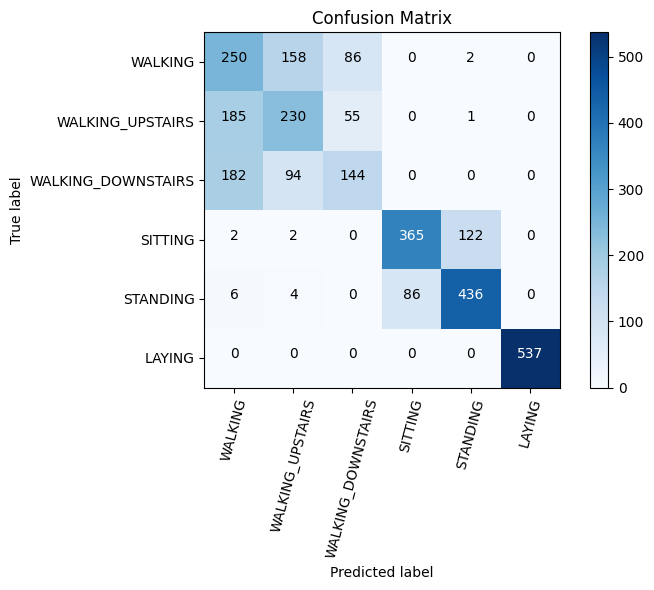

In [188]:
from sklearn.metrics import confusion_matrix

cat = np.array([1,2,3,4,5,6])

# Create the confusion matrix
cm = confusion_matrix(cat[y_test-1], cat[ada_predict_3[-1]-1])

# Get the number of classes
num_classes = 6

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add x-axis and y-axis labels
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, LABELS, rotation=75)
plt.yticks(tick_marks, LABELS)

# Add labels to each cell
thresh = cm.max() / 2.0
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

# Add axis labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Show the plot
plt.tight_layout()
plt.show()

## 2.3 Conclusiones

Comente con qué modelo obtiene los mejores resultados, ¿qué otros experimentos realizaría para intentar mejorar los resultados?

